## Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Load Model Performance Data

In [2]:
df_metrics = pd.read_csv(
    r"/home/samir-dahal/Diabetes_Classification/results/classification_results/classification_metrics.csv"
)
df_metrics

,Model,Accuracy,Precision (macro),Recall (macro),F1-Score (macro),F1 (N),F1 (P),F1 (Y),Training Time (s),CV F1 Mean,CV F1 Std
0,Logistic Regression,0.948187,0.810215,0.871063,0.836893,0.926829,0.608696,0.975155,1.808946,0.923422,0.012045
1,Random Forest,0.994819,0.997967,0.966667,0.981437,1.000000,0.947368,0.996942,23.536123,0.995364,0.001925
2,SVM,0.932642,0.946840,0.733333,0.811063,0.645161,0.823529,0.964497,11.722343,0.992788,0.003782
3,XGBoost,0.994819,0.997967,0.966667,0.981437,1.000000,0.947368,0.996942,11.796157,0.995881,0.002626


## Visualizing Model performance 

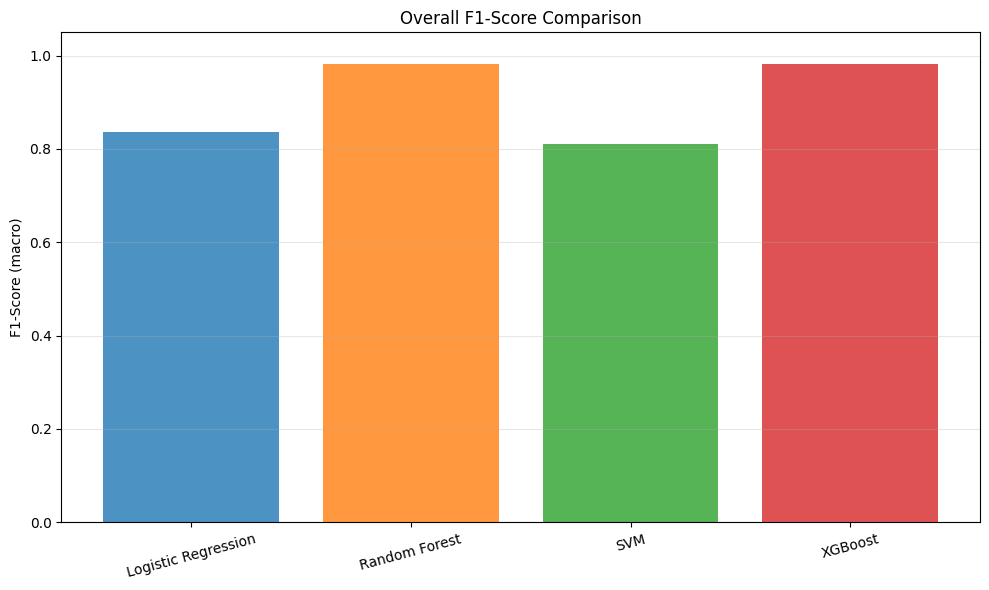

In [3]:
# 1. F1-Score comparison
# 1. F1-Score comparison
plt.figure(figsize=(10, 6))
plt.bar(df_metrics["Model"], df_metrics["F1-Score (macro)"], alpha=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel("F1-Score (macro)")
plt.title("Overall F1-Score Comparison")
plt.ylim([0, 1.05])
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


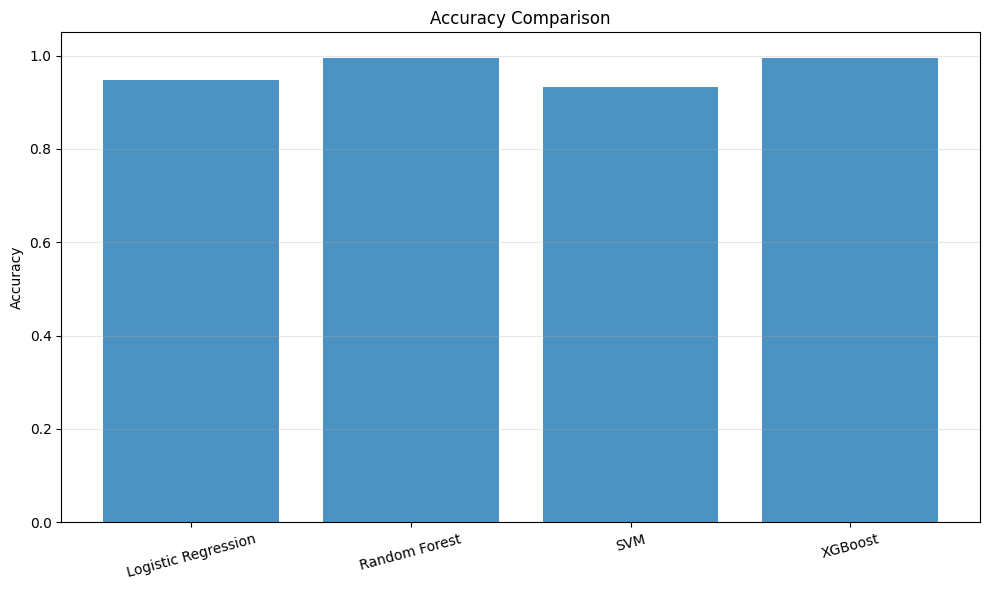

In [ ]:
# 2. Accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(df_metrics["Model"], df_metrics["Accuracy"], alpha=0.8)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.ylim([0, 1.05])
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

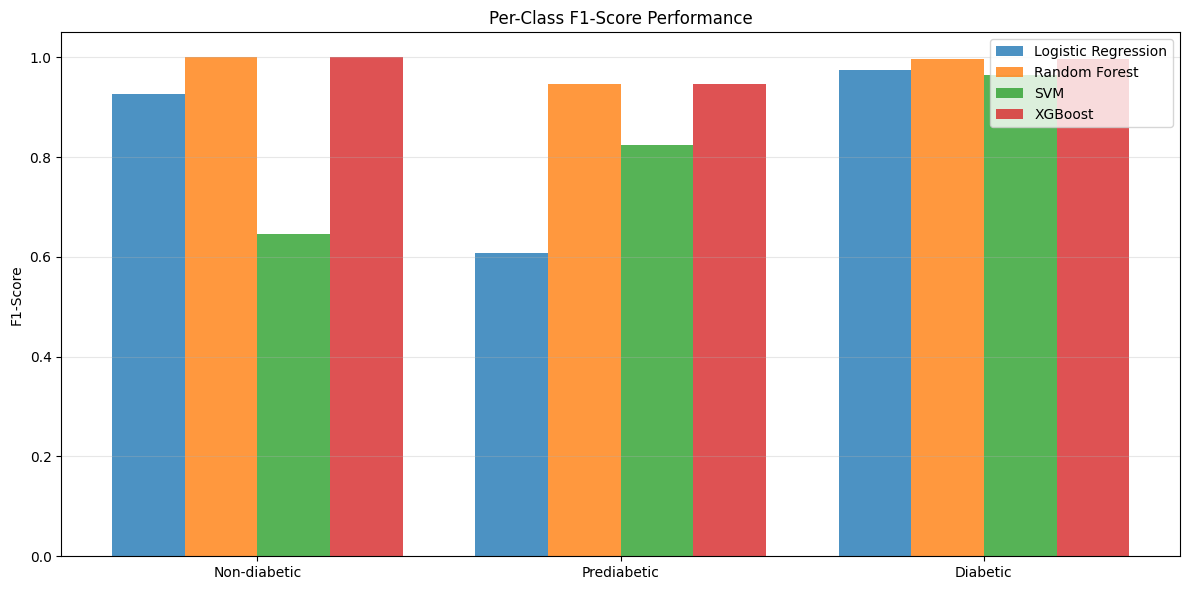

In [5]:
# 3. Per-class F1 scores
plt.figure(figsize=(12, 6))
class_f1_cols = ["F1 (N)", "F1 (P)", "F1 (Y)"]
x = np.arange(len(class_f1_cols))
width = 0.2

for i, model in enumerate(df_metrics["Model"]):
    values = [
        df_metrics.loc[df_metrics["Model"] == model, col].values[0]
        for col in class_f1_cols
    ]
    offset = (i - len(df_metrics) / 2 + 0.5) * width
    plt.bar(x + offset, values, width, label=model, alpha=0.8)

plt.ylabel("F1-Score")
plt.title("Per-Class F1-Score Performance")
plt.xticks(x, ["Non-diabetic", "Prediabetic", "Diabetic"])
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.ylim([0, 1.05])
plt.tight_layout()
plt.show()

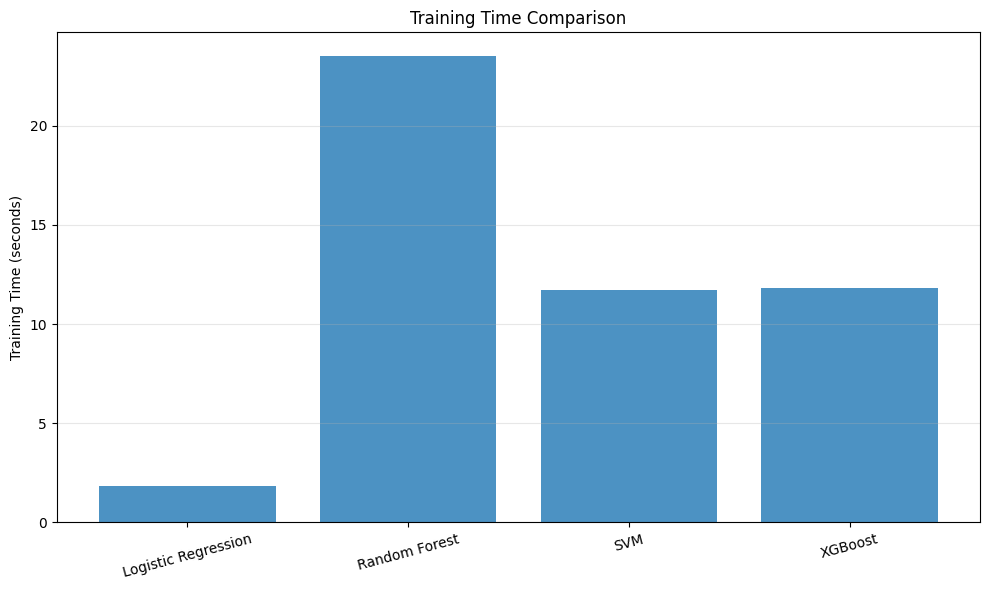

In [6]:
# 4. Training time comparison
plt.figure(figsize=(10, 6))
plt.bar(df_metrics["Model"], df_metrics["Training Time (s)"], alpha=0.8)
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison")
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

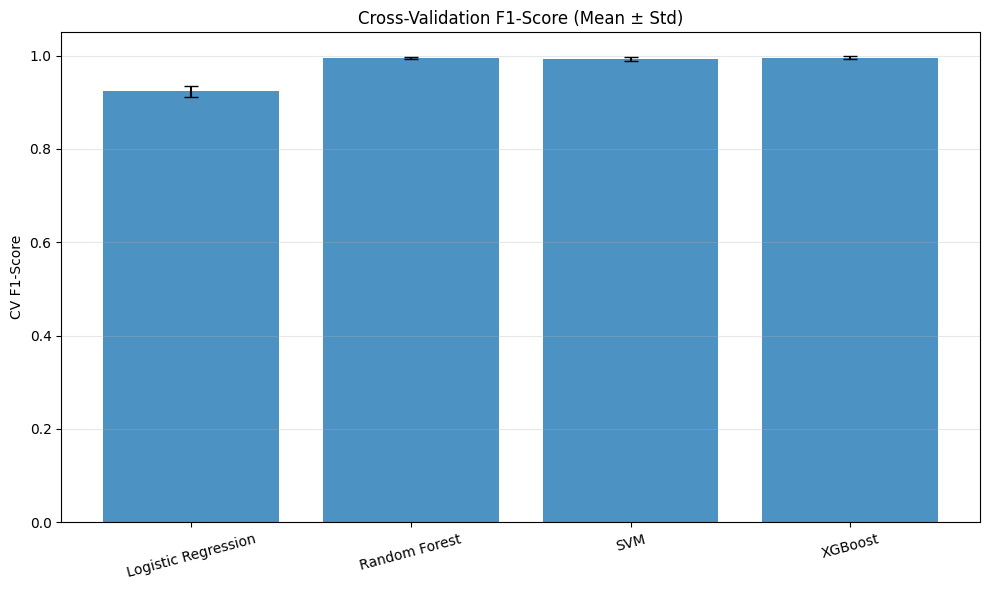

In [7]:
# 5. Cross-validation F1 with error bars
plt.figure(figsize=(10, 6))
plt.bar(
    df_metrics["Model"],
    df_metrics["CV F1 Mean"],
    alpha=0.8,
    yerr=df_metrics["CV F1 Std"],
    capsize=5,
)
plt.ylabel("CV F1-Score")
plt.title("Cross-Validation F1-Score (Mean ± Std)")
plt.ylim([0, 1.05])
plt.grid(axis="y", alpha=0.3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

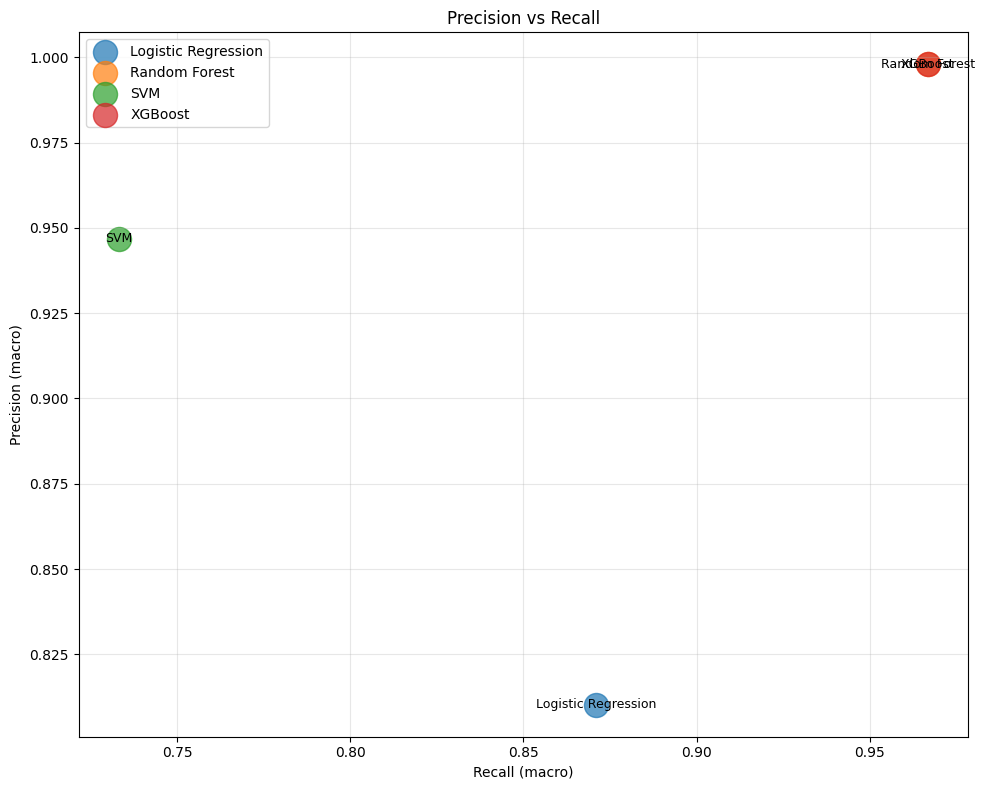

In [8]:
# 6. Precision vs Recall scatter
plt.figure(figsize=(10, 8))
for i, model in enumerate(df_metrics["Model"]):
    plt.scatter(
        df_metrics["Recall (macro)"].iloc[i],
        df_metrics["Precision (macro)"].iloc[i],
        s=300,
        alpha=0.7,
        label=model,
    )
    plt.text(
        df_metrics["Recall (macro)"].iloc[i],
        df_metrics["Precision (macro)"].iloc[i],
        model,
        ha="center",
        va="center",
        fontsize=9,
    )

plt.xlabel("Recall (macro)")
plt.ylabel("Precision (macro)")
plt.title("Precision vs Recall")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# best model is xgboost as we can see in visualization